## Image Caption Generator

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!unzip /content/drive/MyDrive/Project/Images.zip -d /content/drive/MyDrive/dataset/

Archive:  /content/drive/MyDrive/Project/Images.zip
replace /content/drive/MyDrive/dataset/Images/1000268201_693b08cb0e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

warnings.filterwarnings('ignore')

In [17]:
image_path = r"/content/drive/MyDrive/dataset/Images"
data = pd.read_csv(r"/content/drive/MyDrive/dataset/captions.txt")
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [18]:
def readImage(path,img_size=224):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.

    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
        image = readImage(f"{image_path}/{temp_df.image[i]}")
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df.caption[i], 20)))
        plt.axis("off")

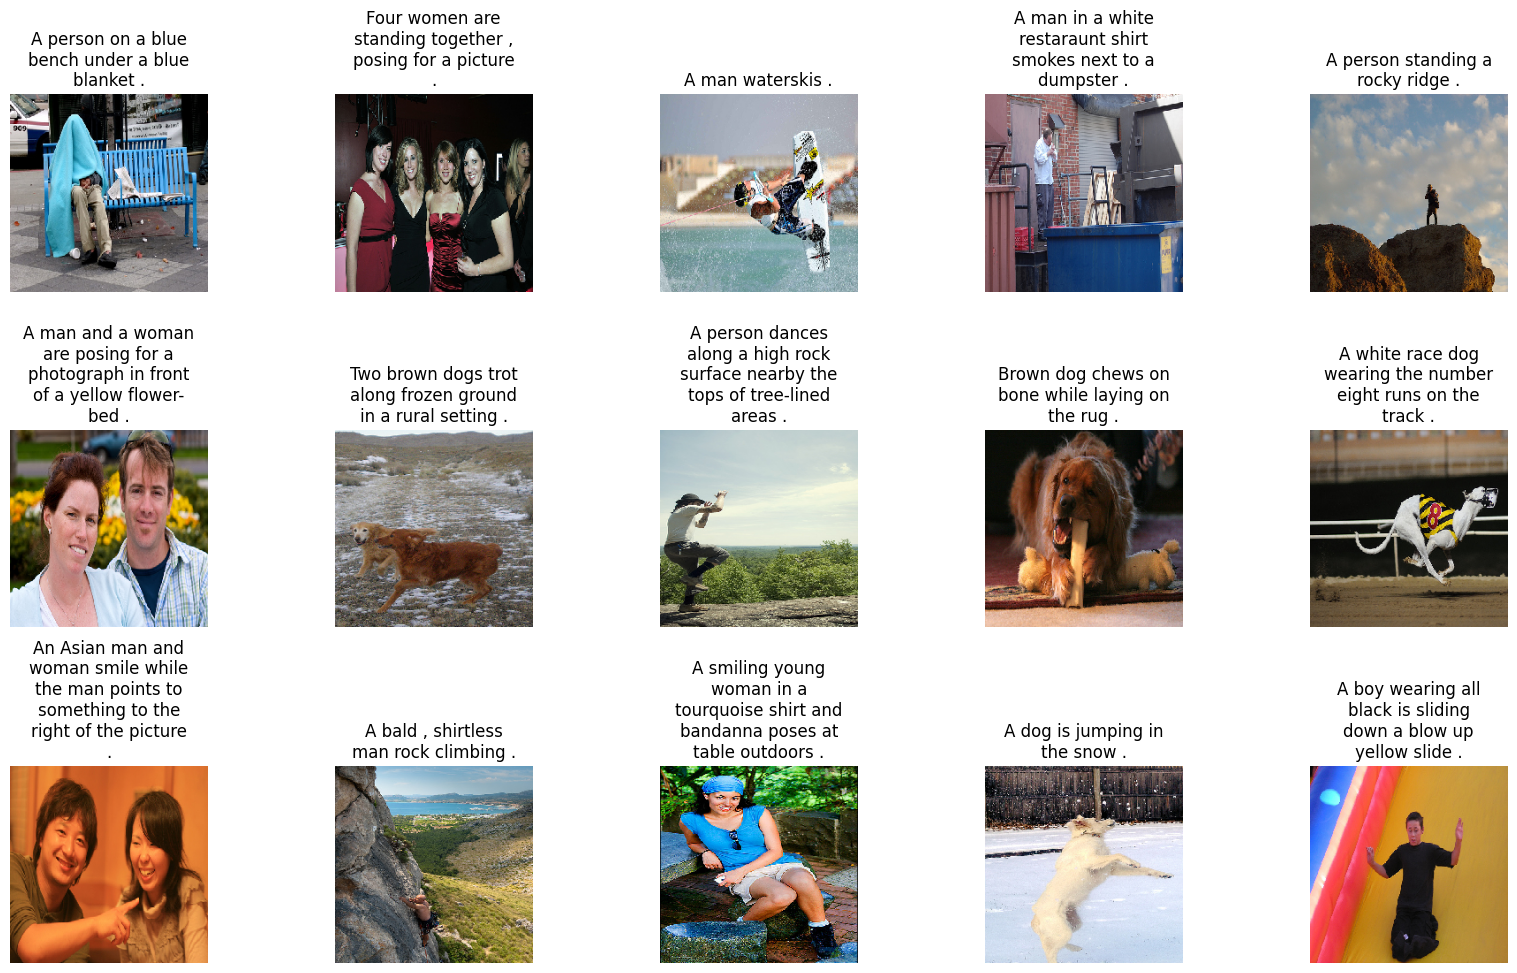

In [19]:
display_images(data.sample(15))

Github

In [21]:
%cd /content/

/content


In [23]:
!git clone https://github.com/Ashwinib26/Image-Captioning.git

Cloning into 'Image-Captioning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [25]:
%cd Image-Captioning

/content/Image-Captioning


In [26]:
!git config --global user.name "Ashwinib26"
!git config --global user.email "ashwinibisen26@gmail.com"

In [28]:
%cd /content/Image-Captioning/

/content/Image-Captioning


In [29]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [30]:
!git add Image-Caption-Generator.ipynb

fatal: pathspec 'Image-Caption-Generator.ipynb' did not match any files


In [31]:
!ls -l

total 4
-rw-r--r-- 1 root root 18 Mar 18 14:45 README.md


In [32]:
import os
print("Current working directory:", os.getcwd())
print("Notebook files:", os.listdir())

Current working directory: /content/Image-Captioning
Notebook files: ['.git', 'README.md']


In [33]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

 assignments.ipynb
'Copy of Copy of Untitled1.ipynb'
'Copy of practise.ipynb'
'Copy of sem_pract ( file handling , strings , data structures ).ipynb'
'Copy of TA-1.ipynb'
'Copy of Untitled1.ipynb'
 externals.ipynb
 Fetch-GEE.ipynb
 file_handling_practise.ipynb
 Functionspractice.ipynb
 Image-Caption-Generator.ipynb
 MLPython.ipynb
'practice_class obj.ipynb'
 pract.ipynb
'sem_pract (control structure and functions).ipynb'
'sem_pract ( file handling , strings , data structures ).ipynb'
'sem_pract( objects n classes , all ).ipynb'
 SP_Practical6.ipynb
'Static Prototype.ipynb'
 strings_in_pyhton.ipynb
 Strings.ipynb
 TA-1.ipynb
 Text-summary-abstractive.ipynb
'unofficial .ipynb'
 Untitled
 Untitled0.ipynb
'Untitled (1)'
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 UT1.ipynb
 UT_2.ipynb
'viva practise.ipynb'


In [34]:
!mv "/content/drive/MyDrive/Colab Notebooks/Image-Caption-Generator.ipynb" /content/repo-name/

mv: cannot create regular file '/content/repo-name/': Not a directory
